<a href="https://colab.research.google.com/github/Equ4lity/DADS5001_Plotly/blob/main/6610422022_HWDADS5001_Plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import plotly.express as px
from datetime import datetime
import pandas as pd
import gspread
from gspread_dataframe import set_with_dataframe
import numpy as np
import plotly.graph_objects as go

sheet_url = 'https://docs.google.com/spreadsheets/d/1fPemCB_onu7O9pAqgfTUOAs1Rsy5O1FH/edit#gid=2027448239'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
data  = pd.read_csv(csv_export_url)


dep_course_counts = data.groupby(['Dep.1', 'Course_type']).size().reset_index(name='Subject Count')
total_courses_by_dep = dep_course_counts.groupby('Dep.1')['Subject Count'].transform('sum')
dep_course_counts['Percentage'] = (dep_course_counts['Subject Count'] / total_courses_by_dep) * 100
fig_stacked_bar = go.Figure()
course_types = dep_course_counts['Course_type'].unique()
colors = px.colors.qualitative.Plotly

for index, course_type in enumerate(course_types):
    filtered_data = dep_course_counts[dep_course_counts['Course_type'] == course_type]
    fig_stacked_bar.add_trace(go.Bar(
        x=filtered_data['Dep.1'],
        y=filtered_data['Subject Count'],
        name=course_type,
        text=filtered_data['Percentage'].apply(lambda x: f'{x:.1f}%'),
        marker_color=colors[index % len(colors)]
    ))

fig_stacked_bar.update_layout(
    barmode='stack',
    title_text='Total Courses by Department with Percentage Contribution of Each Course Type',
    xaxis_title='Department',
    yaxis_title='Total Number of Courses',
    legend_title='Course Type'
)

fig_stacked_bar.show()


In [4]:
#  3.1 Post the image of your chart


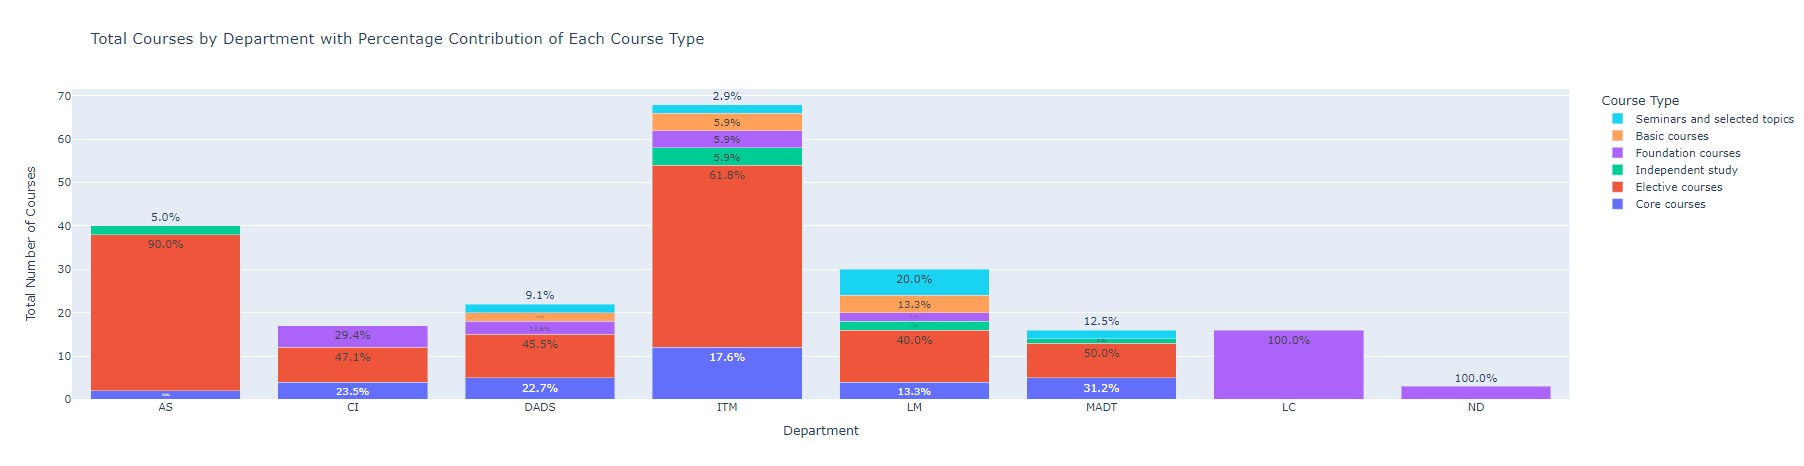

In [5]:
  #  3.2 Explain your data sources
print('ใช้ Webscraping ดึงข้อมูลจากเว็บมหาลัย nida แล้วเก็บข้อมูลใน Google sheet')



ใช้ Webscraping ดึงข้อมูลจากเว็บมหาลัย nida แล้วเก็บข้อมูลใน Google sheet


In [6]:
   #  3.3 Explain why choose the chart with your data
print('ใข้ Stack bargrpah เผื่อดูข้อมูลของแต่ละคณะเปรียบเทียบว่ามีความกระจายของ ชนิดของแต่ละวิชายังไงบ้าง')

ใข้ Stack bargrpah เผื่อดูข้อมูลของแต่ละคณะเปรียบเทียบว่ามีความกระจายของ ชนิดของแต่ละวิชายังไงบ้าง
